In [49]:
import pandas as pd
import os

In [50]:
current_dir = os.getcwd()
path_file = os.path.join(current_dir, "iris.data")

# Ler os dados do CSV com encoding especificado
data = pd.read_csv(path_file, encoding='latin1')

In [51]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [53]:
X = data.drop(['5.1', '3.5', 'Iris-setosa'], axis=1)
y = data['Iris-setosa']

In [54]:
y = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [55]:
X.head()

,1.4,0.2
0,1.4,0.2
1,1.3,0.2
2,1.5,0.2
3,1.4,0.2
4,1.7,0.4


In [56]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Iris-setosa, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
133,2,2
109,2,2
59,1,1
80,1,1
7,0,0


In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Erro quadratico medio (MSE): ', mse)

Erro quadratico medio (MSE):  0.06666666666666667


In [62]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia (Decision Tree):', accuracy)

Acurácia (Decision Tree): 0.9333333333333333


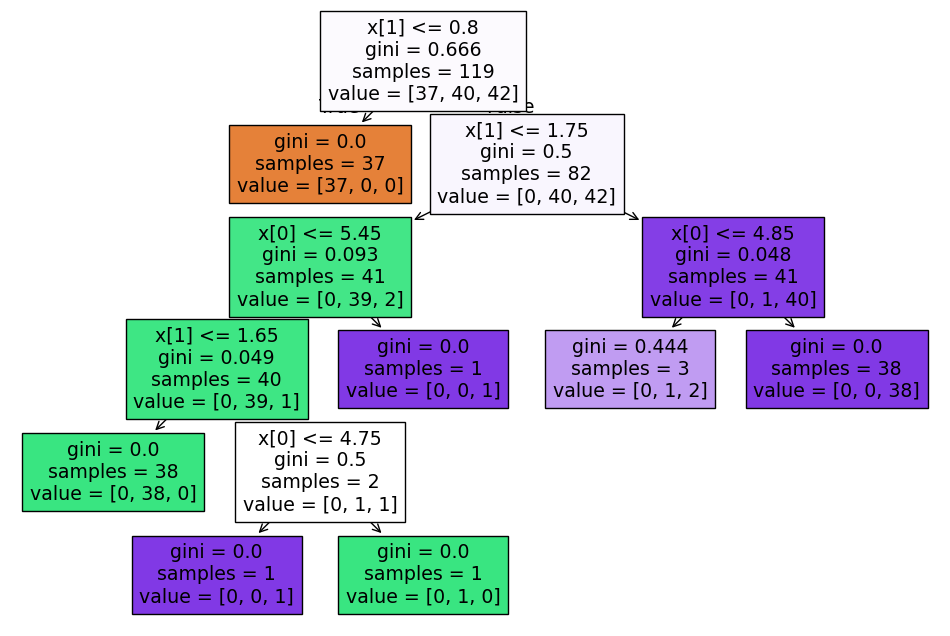

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(classifier, filled = True)
plt.show()